<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [2]:
import time

time.sleep(3*60*60)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [3]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\stft"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_5.npy'))



eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [4]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [5]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [6]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """

    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()

    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()

    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [8]:
import torch
import torch.nn as nn

class LstmAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
        super(LstmAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout if num_layers > 1 else 0
        )

        self.attention = nn.MultiheadAttention(embed_dim=hidden_size * 2, num_heads=2, batch_first=True)

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        self.act = nn.Sigmoid() if num_classes == 1 else nn.Softmax(dim=1)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        lstm_out, _ = self.lstm(x)  # (batch, seq, hidden*2)

        # Apply attention: Q=K=V=lstm_out
        attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)  # (batch, seq, hidden*2)

        # Aggregate via mean pooling or use only last time step
        pooled = attn_out.mean(dim=1)  # (batch, hidden*2)

        out = self.dropout(pooled)
        out = self.fc(out)
        return self.act(out)


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [9]:
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Suppose input is (batch, 224, 672) → for spectrogram shape (224, 224, 3)
# Flatten last two dims: 224 time steps, 672 features
input_size = 224 * 3
hidden_size = 128
num_layers = 1
num_classes = 3  # Binary classification (e.g., seizure vs. no seizure)

model = LstmAttention(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes)
model.to(device)

# Dummy input
x = torch.randn(8, 224, 672).to(device)  # batch_size=8
output = model(x)
print(output.shape)  # Expect: (8, 1)


torch.Size([8, 3])


In [10]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                             Param #
LstmAttention                                      --
├─LSTM: 1-1                                        821,248
├─MultiheadAttention: 1-2                          197,376
│    └─NonDynamicallyQuantizableLinear: 2-1        65,792
├─Dropout: 1-3                                     --
├─Linear: 1-4                                      771
├─Softmax: 1-5                                     --
Total params: 1,085,187
Trainable params: 1,085,187
Non-trainable params: 0

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


RUNNING PARAMETER SET 1/5
Parameters: {'hidden_size': 64, 'num_layers': 4, 'learning_rate': 0.0003457860039763819, 'weight_decay': 5.944172232271371e-06, 'batch_size': 32, 'dropout': 0.3, 'label_smoothing': 0.3, 'factor': 1, 'optimizer_name': 'Adam'}

Fold No: 1
Epoch [1/100], Loss: 0.6797, Accuracy: 0.5929
Validation Loss: 0.6357, Validation Accuracy: 0.7077
Epoch [2/100], Loss: 0.6411, Accuracy: 0.6866
Validation Loss: 0.6387, Validation Accuracy: 0.7415
Epoch [3/100], Loss: 0.6381, Accuracy: 0.6978
Validation Loss: 0.6907, Validation Accuracy: 0.6599
Epoch [4/100], Loss: 0.6313, Accuracy: 0.7121
Validation Loss: 0.6038, Validation Accuracy: 0.7741
Epoch [5/100], Loss: 0.6486, Accuracy: 0.6875
Validation Loss: 0.6880, Validation Accuracy: 0.7197
Epoch [6/100], Loss: 0.6275, Accuracy: 0.7277
Validation Loss: 0.5909, Validation Accuracy: 0.7892
Epoch [7/100], Loss: 0.6190, Accuracy: 0.7473
Validation Loss: 0.6742, Validation Accuracy: 0.6994
Epoch [8/100], Loss: 0.6205, Accuracy: 0.73

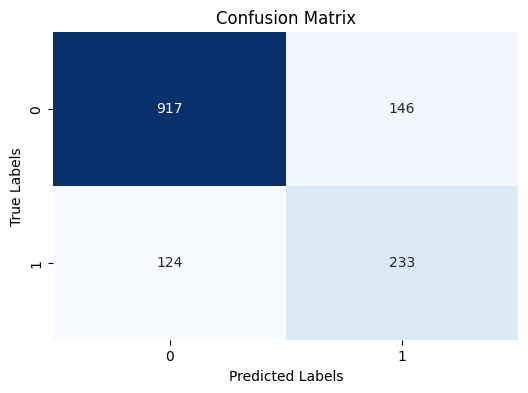


Class-wise Accuracy:
Class 0: 917/1063 (86.27%)
Class 1: 233/357 (65.27%)

Precision-Recall Curve:


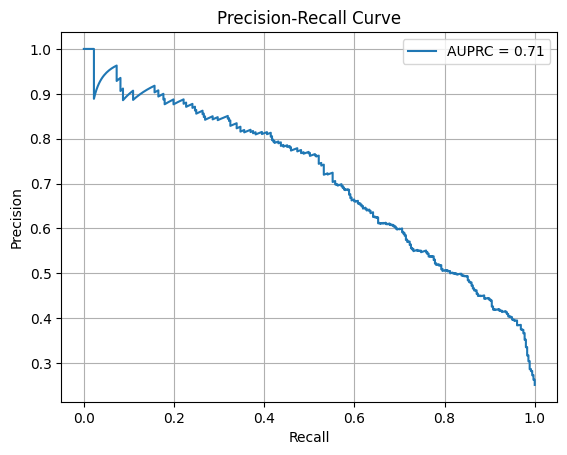


ROC Curve:


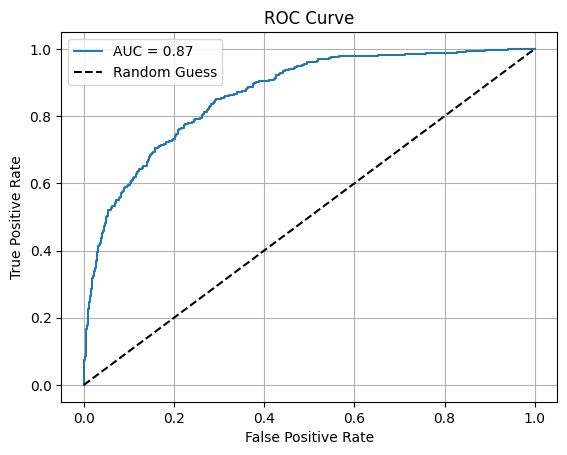


Mean F1 Score: 0.7524
Balanced Accuracy: 0.7577
Average AUPRC: 0.7071

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1063
           1       0.61      0.65      0.63       357

    accuracy                           0.81      1420
   macro avg       0.75      0.76      0.75      1420
weighted avg       0.81      0.81      0.81      1420

Fold No: 2
Epoch [1/100], Loss: 0.6855, Accuracy: 0.5442
Validation Loss: 0.6247, Validation Accuracy: 0.6933
Epoch [2/100], Loss: 0.6311, Accuracy: 0.7164
Validation Loss: 0.5915, Validation Accuracy: 0.6469
Epoch [3/100], Loss: 0.6307, Accuracy: 0.7253
Validation Loss: 0.6603, Validation Accuracy: 0.7231
Epoch [4/100], Loss: 0.6332, Accuracy: 0.7164
Validation Loss: 0.6058, Validation Accuracy: 0.6848
Epoch [5/100], Loss: 0.6294, Accuracy: 0.7196
Validation Loss: 0.5980, Validation Accuracy: 0.6719
Epoch [6/100], Loss: 0.6048, Accuracy: 0.7638
Validation Loss: 0.6389, V

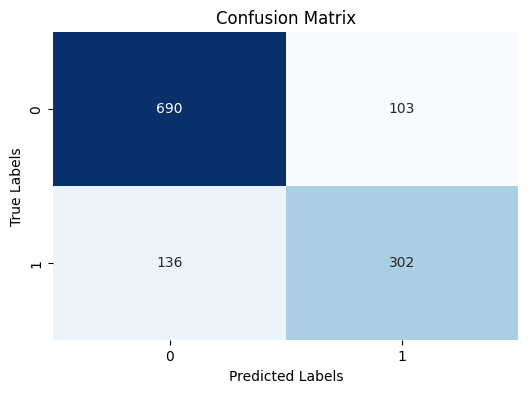


Class-wise Accuracy:
Class 0: 690/793 (87.01%)
Class 1: 302/438 (68.95%)

Precision-Recall Curve:


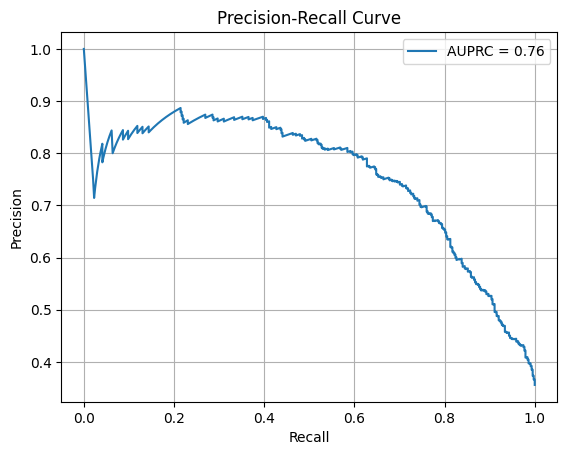


ROC Curve:


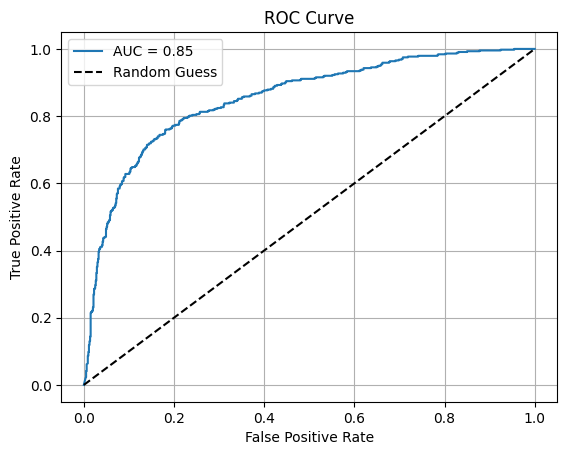


Mean F1 Score: 0.7844
Balanced Accuracy: 0.7798
Average AUPRC: 0.7559

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       793
           1       0.75      0.69      0.72       438

    accuracy                           0.81      1231
   macro avg       0.79      0.78      0.78      1231
weighted avg       0.80      0.81      0.80      1231

Fold No: 3
Epoch [1/100], Loss: 0.6886, Accuracy: 0.5525
Validation Loss: 0.6983, Validation Accuracy: 0.6069
Epoch [2/100], Loss: 0.6296, Accuracy: 0.7209
Validation Loss: 0.6588, Validation Accuracy: 0.6465
Epoch [3/100], Loss: 0.6378, Accuracy: 0.7013
Validation Loss: 0.6423, Validation Accuracy: 0.6605
Epoch [4/100], Loss: 0.6236, Accuracy: 0.7312
Validation Loss: 0.6716, Validation Accuracy: 0.6740
Epoch [5/100], Loss: 0.6218, Accuracy: 0.7343
Validation Loss: 0.6440, Validation Accuracy: 0.5617
Epoch [6/100], Loss: 0.5973, Accuracy: 0.7734
Validation Loss: 0.6012, V

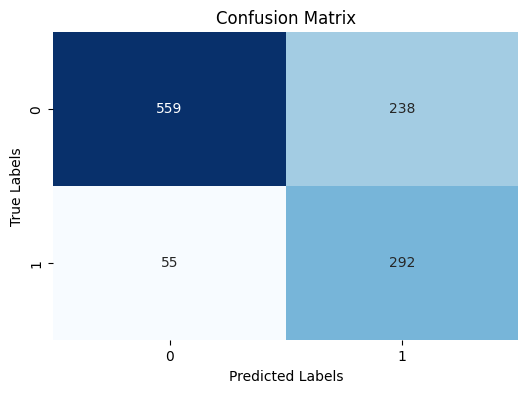


Class-wise Accuracy:
Class 0: 559/797 (70.14%)
Class 1: 292/347 (84.15%)

Precision-Recall Curve:


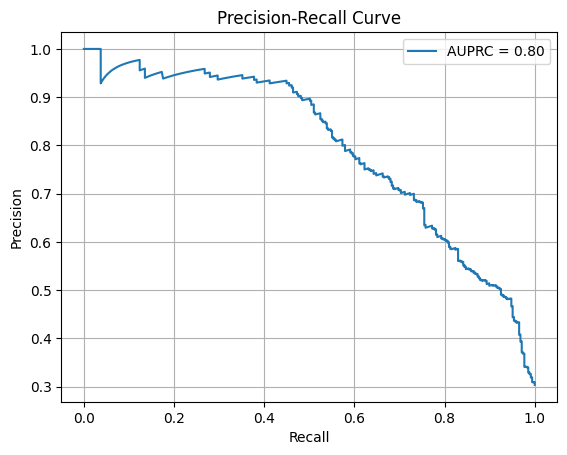


ROC Curve:


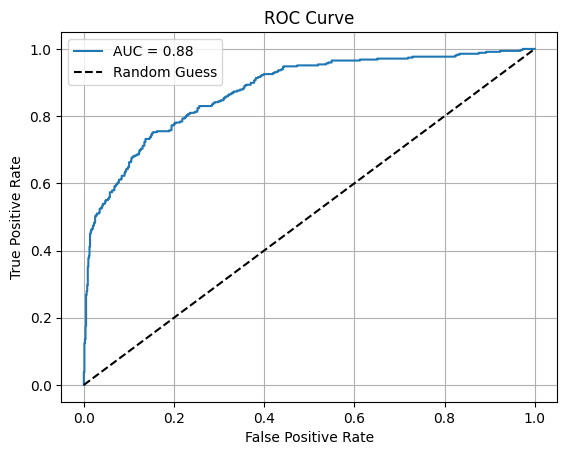


Mean F1 Score: 0.7291
Balanced Accuracy: 0.7714
Average AUPRC: 0.7955

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       797
           1       0.55      0.84      0.67       347

    accuracy                           0.74      1144
   macro avg       0.73      0.77      0.73      1144
weighted avg       0.80      0.74      0.75      1144

Fold No: 4
Epoch [1/100], Loss: 0.6907, Accuracy: 0.5177
Validation Loss: 0.6406, Validation Accuracy: 0.5364
Epoch [2/100], Loss: 0.6686, Accuracy: 0.6336
Validation Loss: 0.6437, Validation Accuracy: 0.7014
Epoch [3/100], Loss: 0.6410, Accuracy: 0.7002
Validation Loss: 0.6141, Validation Accuracy: 0.7495
Epoch [4/100], Loss: 0.6272, Accuracy: 0.7291
Validation Loss: 0.6087, Validation Accuracy: 0.6251
Epoch [5/100], Loss: 0.6248, Accuracy: 0.7230
Validation Loss: 0.6070, Validation Accuracy: 0.7252
Epoch [6/100], Loss: 0.6165, Accuracy: 0.7463
Validation Loss: 0.5916, V

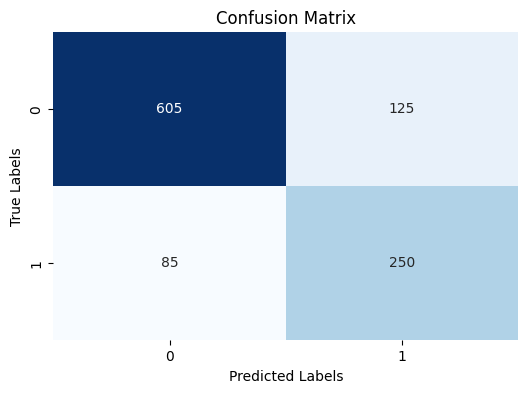


Class-wise Accuracy:
Class 0: 605/730 (82.88%)
Class 1: 250/335 (74.63%)

Precision-Recall Curve:


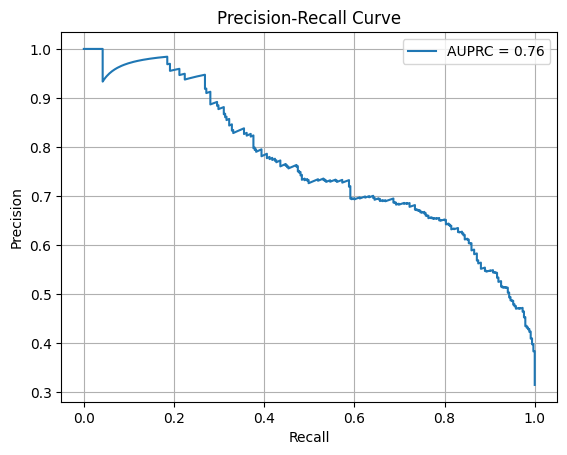


ROC Curve:


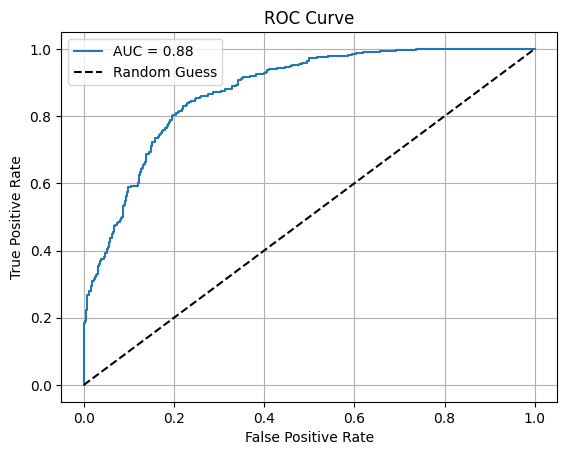


Mean F1 Score: 0.7782
Balanced Accuracy: 0.7875
Average AUPRC: 0.7648

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       730
           1       0.67      0.75      0.70       335

    accuracy                           0.80      1065
   macro avg       0.77      0.79      0.78      1065
weighted avg       0.81      0.80      0.81      1065

Fold No: 5
Epoch [1/100], Loss: 0.6848, Accuracy: 0.5403
Validation Loss: 0.6157, Validation Accuracy: 0.7188
Epoch [2/100], Loss: 0.6490, Accuracy: 0.6782
Validation Loss: 0.7017, Validation Accuracy: 0.6809
Epoch [3/100], Loss: 0.6459, Accuracy: 0.6856
Validation Loss: 0.6233, Validation Accuracy: 0.7630
Epoch [4/100], Loss: 0.6317, Accuracy: 0.7194
Validation Loss: 0.6278, Validation Accuracy: 0.7618
Epoch [5/100], Loss: 0.6134, Accuracy: 0.7526
Validation Loss: 0.6280, Validation Accuracy: 0.7636
Epoch [6/100], Loss: 0.6230, Accuracy: 0.7224
Validation Loss: 0.5927, V

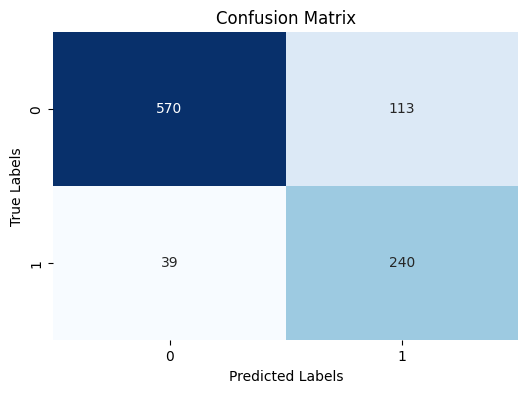


Class-wise Accuracy:
Class 0: 570/683 (83.46%)
Class 1: 240/279 (86.02%)

Precision-Recall Curve:


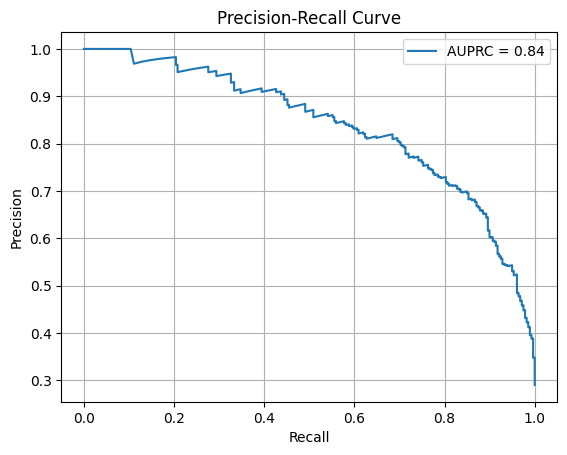


ROC Curve:


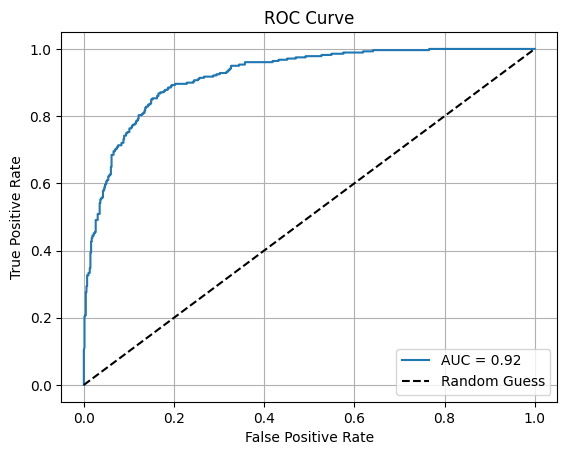


Mean F1 Score: 0.8209
Balanced Accuracy: 0.8474
Average AUPRC: 0.8373

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       683
           1       0.68      0.86      0.76       279

    accuracy                           0.84       962
   macro avg       0.81      0.85      0.82       962
weighted avg       0.86      0.84      0.85       962


PARAMETER SET 1 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7577
   Fold 2: 0.7798
   Fold 3: 0.7714
   Fold 4: 0.7875
   Fold 5: 0.8474

2) Average balanced accuracy across all folds: 0.7888

3) Average AUPRC across all folds: 0.7721

4) AUPRC per fold:
   Fold 1: 0.7071
   Fold 2: 0.7559
   Fold 3: 0.7955
   Fold 4: 0.7648
   Fold 5: 0.8373

5) Best fold class-wise accuracy (Fold 5):
   Class 0: 0.8346
   Class 1: 0.8602


RUNNING PARAMETER SET 2/5
Parameters: {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.00046037658937661427, 'weight_d

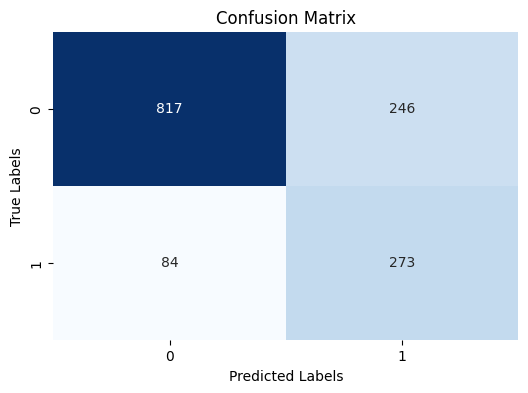


Class-wise Accuracy:
Class 0: 817/1063 (76.86%)
Class 1: 273/357 (76.47%)

Precision-Recall Curve:


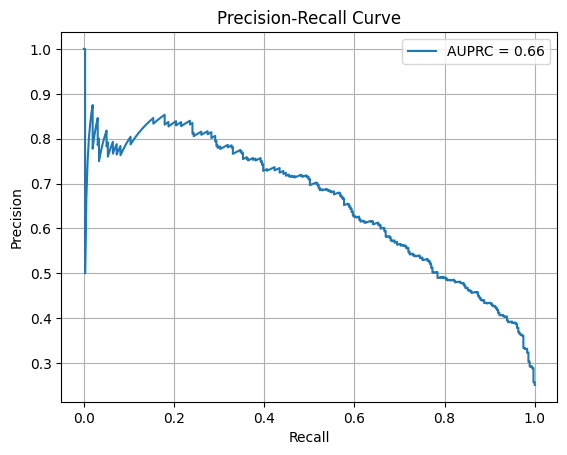


ROC Curve:


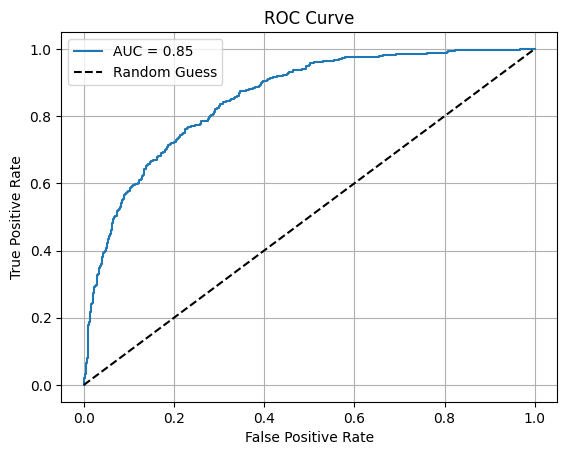


Mean F1 Score: 0.7276
Balanced Accuracy: 0.7666
Average AUPRC: 0.6571

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1063
           1       0.53      0.76      0.62       357

    accuracy                           0.77      1420
   macro avg       0.72      0.77      0.73      1420
weighted avg       0.81      0.77      0.78      1420

Fold No: 2
Epoch [1/100], Loss: 0.6675, Accuracy: 0.6285
Validation Loss: 0.6866, Validation Accuracy: 0.6914
Epoch [2/100], Loss: 0.6333, Accuracy: 0.7128
Validation Loss: 0.6846, Validation Accuracy: 0.7092
Epoch [3/100], Loss: 0.6137, Accuracy: 0.7492
Validation Loss: 0.6801, Validation Accuracy: 0.7472
Epoch [4/100], Loss: 0.6159, Accuracy: 0.7529
Validation Loss: 0.5728, Validation Accuracy: 0.6912
Epoch [5/100], Loss: 0.6037, Accuracy: 0.7721
Validation Loss: 0.5809, Validation Accuracy: 0.7009
Epoch [6/100], Loss: 0.6066, Accuracy: 0.7685
Validation Loss: 0.8937, V

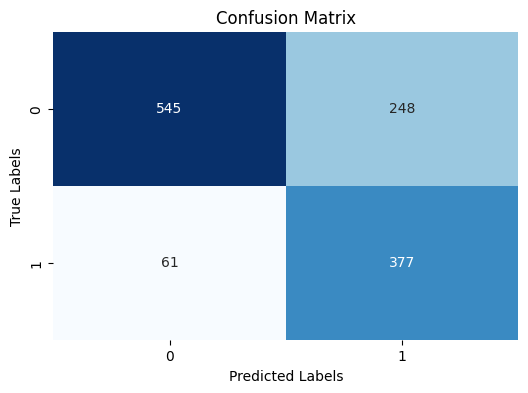


Class-wise Accuracy:
Class 0: 545/793 (68.73%)
Class 1: 377/438 (86.07%)

Precision-Recall Curve:


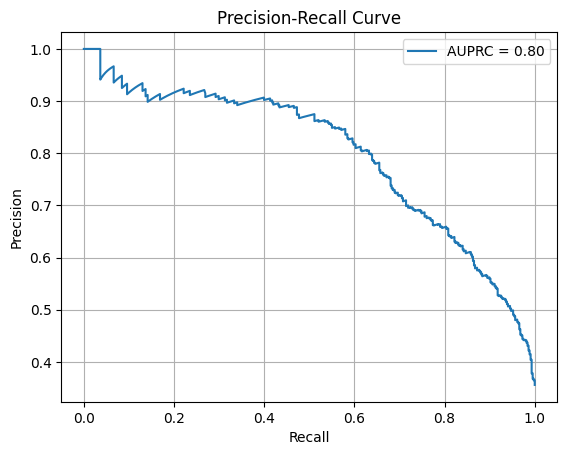


ROC Curve:


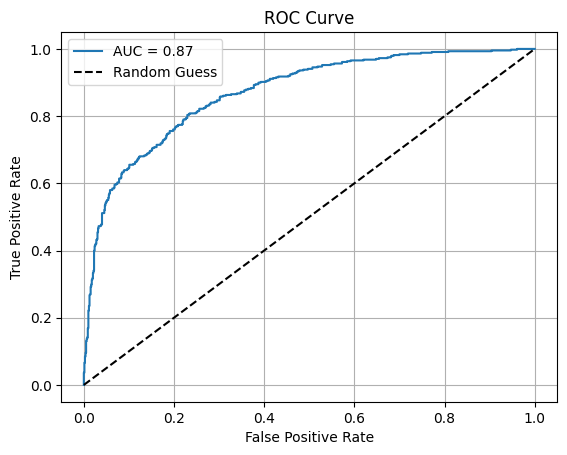


Mean F1 Score: 0.7442
Balanced Accuracy: 0.7740
Average AUPRC: 0.7985

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       793
           1       0.60      0.86      0.71       438

    accuracy                           0.75      1231
   macro avg       0.75      0.77      0.74      1231
weighted avg       0.79      0.75      0.75      1231

Fold No: 3
Epoch [1/100], Loss: 0.6685, Accuracy: 0.6390
Validation Loss: 0.7207, Validation Accuracy: 0.6390
Epoch [2/100], Loss: 0.6413, Accuracy: 0.7044
Validation Loss: 0.6393, Validation Accuracy: 0.7401
Epoch [3/100], Loss: 0.6221, Accuracy: 0.7379
Validation Loss: 0.6263, Validation Accuracy: 0.7475
Epoch [4/100], Loss: 0.6092, Accuracy: 0.7626
Validation Loss: 0.6740, Validation Accuracy: 0.6969
Epoch [5/100], Loss: 0.6126, Accuracy: 0.7570
Validation Loss: 0.6081, Validation Accuracy: 0.7608
Epoch [6/100], Loss: 0.5973, Accuracy: 0.7817
Validation Loss: 0.6077, V

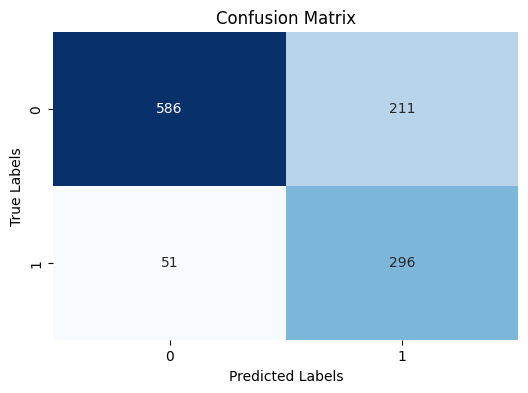


Class-wise Accuracy:
Class 0: 586/797 (73.53%)
Class 1: 296/347 (85.30%)

Precision-Recall Curve:


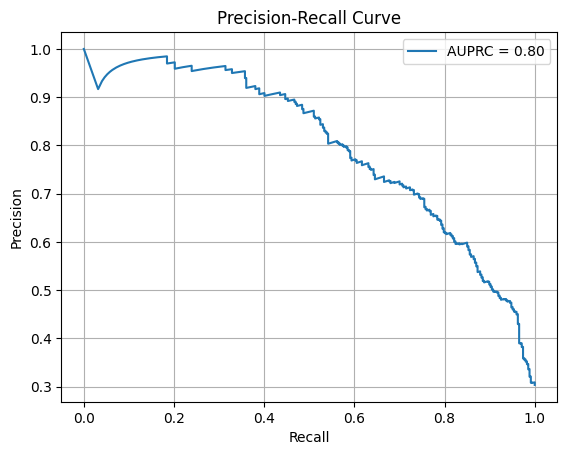


ROC Curve:


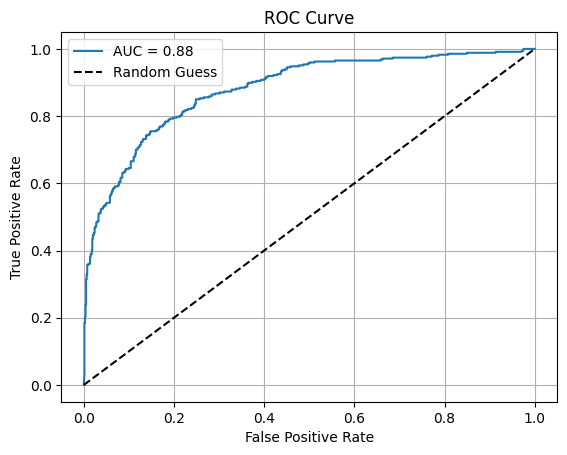


Mean F1 Score: 0.7553
Balanced Accuracy: 0.7941
Average AUPRC: 0.7979

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       797
           1       0.58      0.85      0.69       347

    accuracy                           0.77      1144
   macro avg       0.75      0.79      0.76      1144
weighted avg       0.82      0.77      0.78      1144

Fold No: 4
Epoch [1/100], Loss: 0.6846, Accuracy: 0.5591
Validation Loss: 0.6142, Validation Accuracy: 0.6742
Epoch [2/100], Loss: 0.6565, Accuracy: 0.6792
Validation Loss: 0.6308, Validation Accuracy: 0.7078
Epoch [3/100], Loss: 0.6365, Accuracy: 0.7169
Validation Loss: 0.6169, Validation Accuracy: 0.6927
Epoch [4/100], Loss: 0.6296, Accuracy: 0.7221
Validation Loss: 0.6567, Validation Accuracy: 0.6680
Epoch [5/100], Loss: 0.6582, Accuracy: 0.6643
Validation Loss: 0.6698, Validation Accuracy: 0.6792
Epoch [6/100], Loss: 0.6518, Accuracy: 0.6839
Validation Loss: 0.6574, V

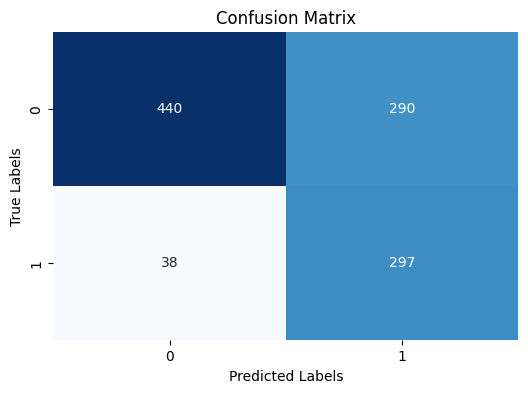


Class-wise Accuracy:
Class 0: 440/730 (60.27%)
Class 1: 297/335 (88.66%)

Precision-Recall Curve:


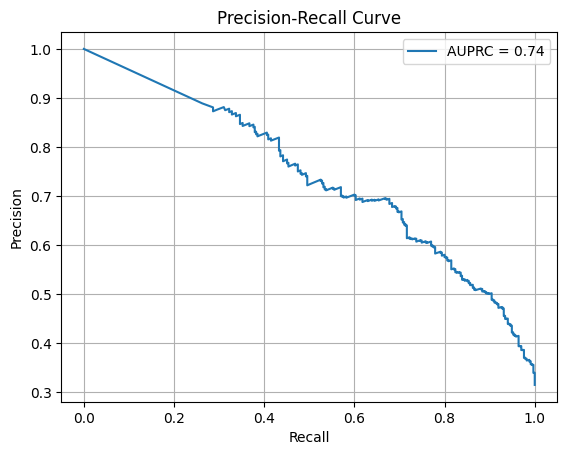


ROC Curve:


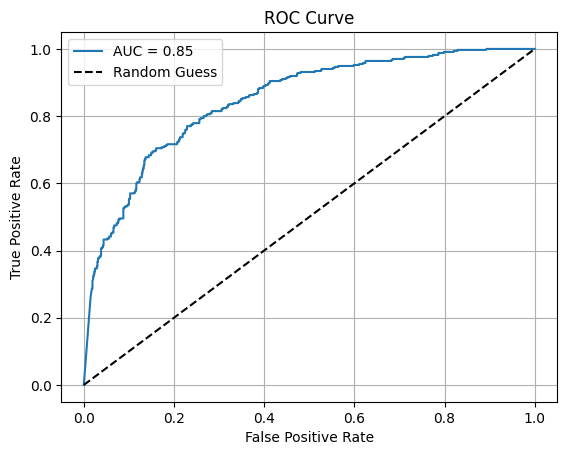


Mean F1 Score: 0.6864
Balanced Accuracy: 0.7447
Average AUPRC: 0.7411

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.60      0.73       730
           1       0.51      0.89      0.64       335

    accuracy                           0.69      1065
   macro avg       0.71      0.74      0.69      1065
weighted avg       0.79      0.69      0.70      1065

Fold No: 5
Epoch [1/100], Loss: 0.6637, Accuracy: 0.6388
Validation Loss: 0.6124, Validation Accuracy: 0.7073
Epoch [2/100], Loss: 0.6521, Accuracy: 0.6778
Validation Loss: 0.6829, Validation Accuracy: 0.6953
Epoch [3/100], Loss: 0.6411, Accuracy: 0.6979
Validation Loss: 0.5860, Validation Accuracy: 0.7324
Epoch [4/100], Loss: 0.6278, Accuracy: 0.7255
Validation Loss: 0.6032, Validation Accuracy: 0.7933
Epoch [5/100], Loss: 0.6270, Accuracy: 0.7272
Validation Loss: 0.5926, Validation Accuracy: 0.7408
Epoch [6/100], Loss: 0.6123, Accuracy: 0.7544
Validation Loss: 0.5852, V

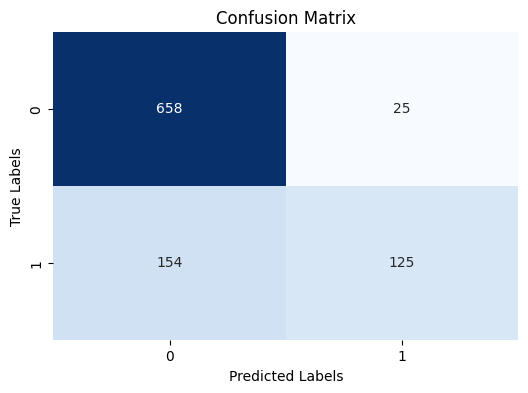


Class-wise Accuracy:
Class 0: 658/683 (96.34%)
Class 1: 125/279 (44.80%)

Precision-Recall Curve:


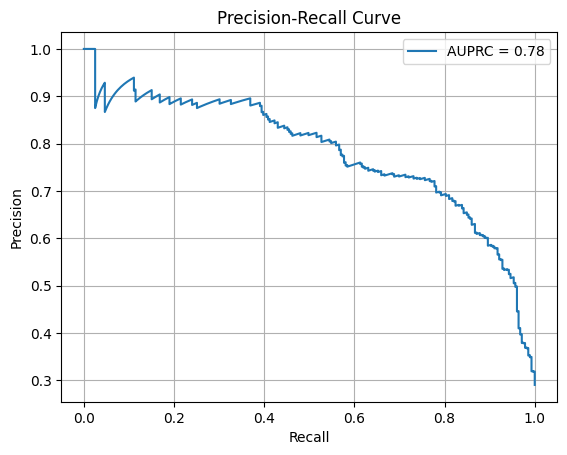


ROC Curve:


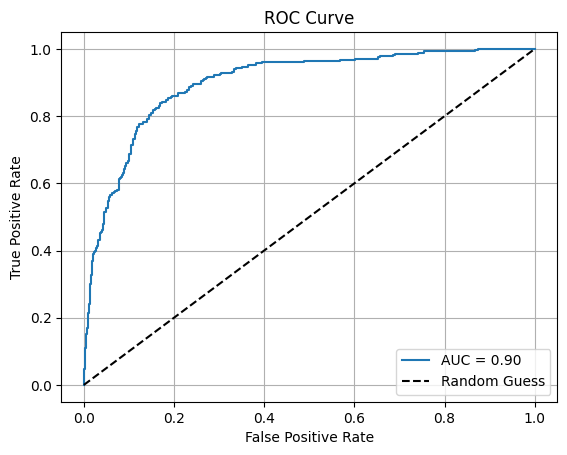


Mean F1 Score: 0.7315
Balanced Accuracy: 0.7057
Average AUPRC: 0.7816

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       683
           1       0.83      0.45      0.58       279

    accuracy                           0.81       962
   macro avg       0.82      0.71      0.73       962
weighted avg       0.82      0.81      0.79       962


PARAMETER SET 2 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7666
   Fold 2: 0.7740
   Fold 3: 0.7941
   Fold 4: 0.7447
   Fold 5: 0.7057

2) Average balanced accuracy across all folds: 0.7570

3) Average AUPRC across all folds: 0.7553

4) AUPRC per fold:
   Fold 1: 0.6571
   Fold 2: 0.7985
   Fold 3: 0.7979
   Fold 4: 0.7411
   Fold 5: 0.7816

5) Best fold class-wise accuracy (Fold 3):
   Class 0: 0.7353
   Class 1: 0.8530


RUNNING PARAMETER SET 3/5
Parameters: {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.00020601678097967096, 'weight_d

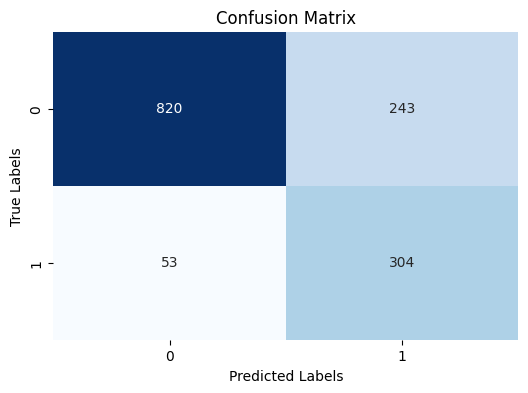


Class-wise Accuracy:
Class 0: 820/1063 (77.14%)
Class 1: 304/357 (85.15%)

Precision-Recall Curve:


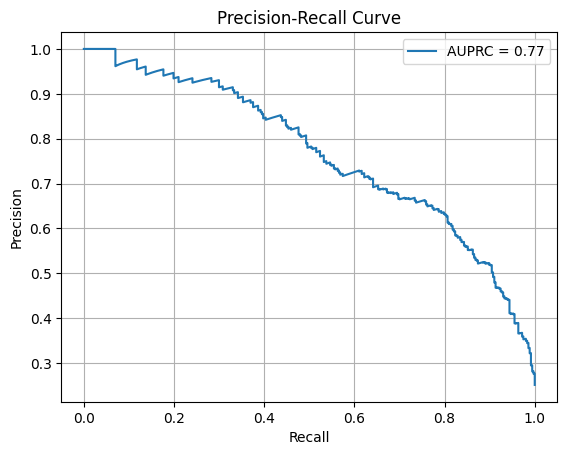


ROC Curve:


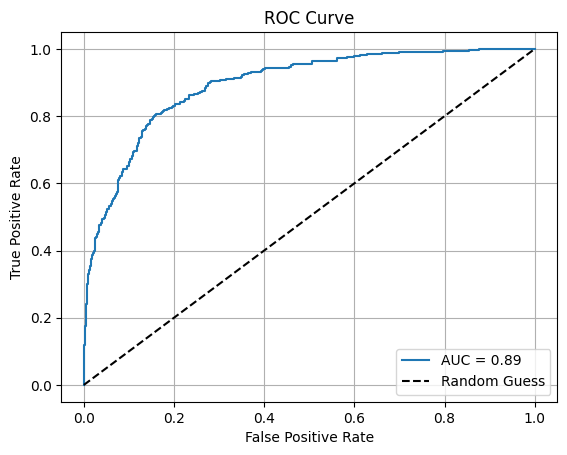


Mean F1 Score: 0.7598
Balanced Accuracy: 0.8115
Average AUPRC: 0.7663

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1063
           1       0.56      0.85      0.67       357

    accuracy                           0.79      1420
   macro avg       0.75      0.81      0.76      1420
weighted avg       0.84      0.79      0.80      1420

Fold No: 2
Epoch [1/100], Loss: 0.6604, Accuracy: 0.6243
Validation Loss: 0.5974, Validation Accuracy: 0.5904
Epoch [2/100], Loss: 0.6263, Accuracy: 0.7388
Validation Loss: 0.7595, Validation Accuracy: 0.6695
Epoch [3/100], Loss: 0.6091, Accuracy: 0.7601
Validation Loss: 0.6309, Validation Accuracy: 0.7522
Epoch [4/100], Loss: 0.6139, Accuracy: 0.7471
Validation Loss: 0.7341, Validation Accuracy: 0.6680
Epoch [5/100], Loss: 0.6069, Accuracy: 0.7627
Validation Loss: 0.5913, Validation Accuracy: 0.7343
Epoch [6/100], Loss: 0.5987, Accuracy: 0.7747
Validation Loss: 0.6099, V

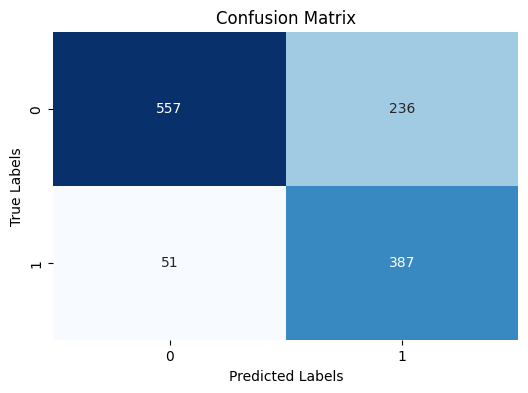


Class-wise Accuracy:
Class 0: 557/793 (70.24%)
Class 1: 387/438 (88.36%)

Precision-Recall Curve:


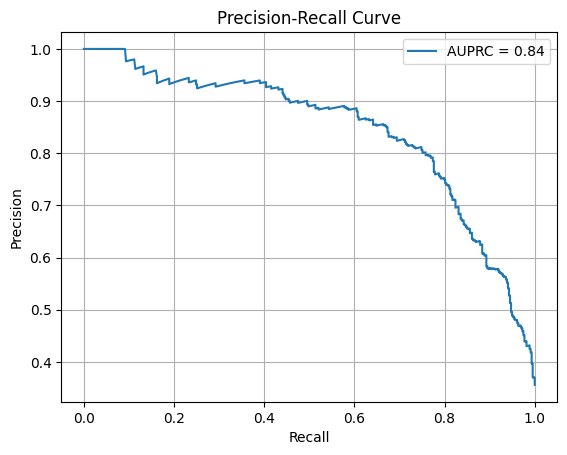


ROC Curve:


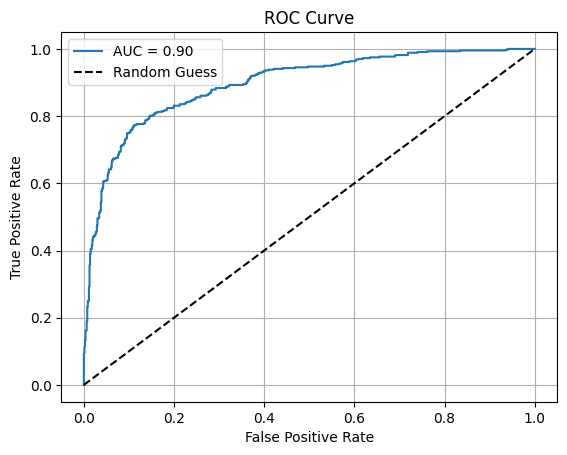


Mean F1 Score: 0.7623
Balanced Accuracy: 0.7930
Average AUPRC: 0.8437

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       793
           1       0.62      0.88      0.73       438

    accuracy                           0.77      1231
   macro avg       0.77      0.79      0.76      1231
weighted avg       0.81      0.77      0.77      1231

Fold No: 3
Epoch [1/100], Loss: 0.6686, Accuracy: 0.6014
Validation Loss: 0.6617, Validation Accuracy: 0.7108
Epoch [2/100], Loss: 0.6214, Accuracy: 0.7302
Validation Loss: 0.6273, Validation Accuracy: 0.7171
Epoch [3/100], Loss: 0.6066, Accuracy: 0.7626
Validation Loss: 0.6180, Validation Accuracy: 0.7204
Epoch [4/100], Loss: 0.5965, Accuracy: 0.7801
Validation Loss: 0.6043, Validation Accuracy: 0.7519
Epoch [5/100], Loss: 0.6014, Accuracy: 0.7760
Validation Loss: 0.6511, Validation Accuracy: 0.7344
Epoch [6/100], Loss: 0.5946, Accuracy: 0.7796
Validation Loss: 0.5926, V

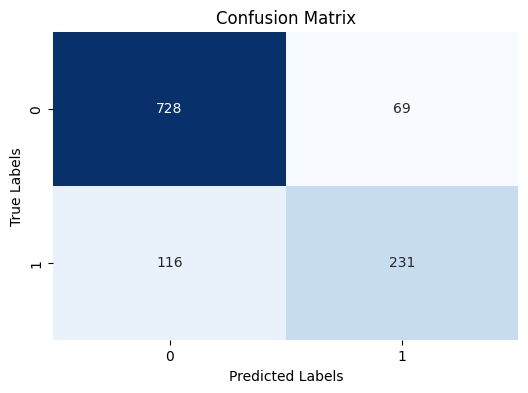


Class-wise Accuracy:
Class 0: 728/797 (91.34%)
Class 1: 231/347 (66.57%)

Precision-Recall Curve:


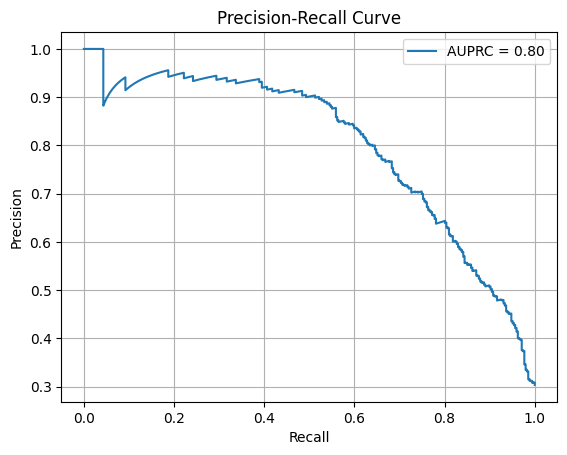


ROC Curve:


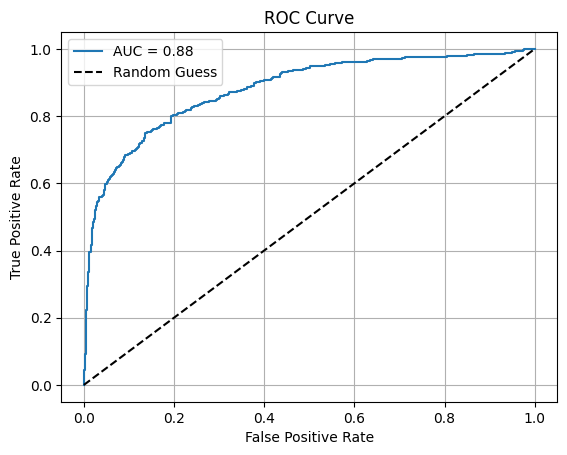


Mean F1 Score: 0.8007
Balanced Accuracy: 0.7896
Average AUPRC: 0.8013

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       797
           1       0.77      0.67      0.71       347

    accuracy                           0.84      1144
   macro avg       0.82      0.79      0.80      1144
weighted avg       0.83      0.84      0.83      1144

Fold No: 4
Epoch [1/100], Loss: 0.6672, Accuracy: 0.6178
Validation Loss: 0.6281, Validation Accuracy: 0.7407
Epoch [2/100], Loss: 0.6283, Accuracy: 0.7402
Validation Loss: 0.5943, Validation Accuracy: 0.6976
Epoch [3/100], Loss: 0.6209, Accuracy: 0.7314
Validation Loss: 0.6063, Validation Accuracy: 0.6341
Epoch [4/100], Loss: 0.6097, Accuracy: 0.7537
Validation Loss: 0.5958, Validation Accuracy: 0.7830
Epoch [5/100], Loss: 0.5987, Accuracy: 0.7761
Validation Loss: 0.6088, Validation Accuracy: 0.7569
Epoch [6/100], Loss: 0.6077, Accuracy: 0.7621
Validation Loss: 0.5907, V

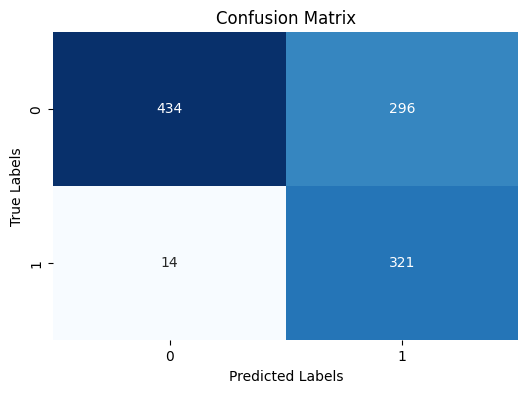


Class-wise Accuracy:
Class 0: 434/730 (59.45%)
Class 1: 321/335 (95.82%)

Precision-Recall Curve:


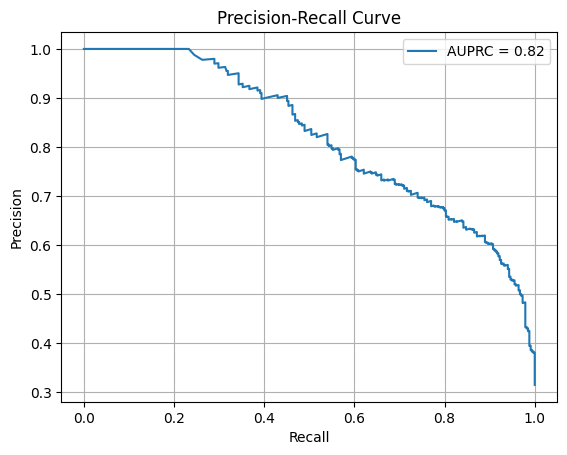


ROC Curve:


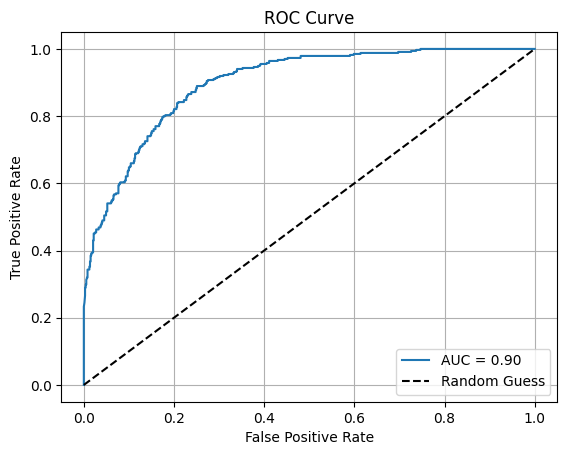


Mean F1 Score: 0.7056
Balanced Accuracy: 0.7764
Average AUPRC: 0.8194

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.59      0.74       730
           1       0.52      0.96      0.67       335

    accuracy                           0.71      1065
   macro avg       0.74      0.78      0.71      1065
weighted avg       0.83      0.71      0.72      1065

Fold No: 5
Epoch [1/100], Loss: 0.6603, Accuracy: 0.6344
Validation Loss: 0.6381, Validation Accuracy: 0.7590
Epoch [2/100], Loss: 0.6309, Accuracy: 0.7132
Validation Loss: 0.6159, Validation Accuracy: 0.7907
Epoch [3/100], Loss: 0.6237, Accuracy: 0.7338
Validation Loss: 0.5774, Validation Accuracy: 0.8002
Epoch [4/100], Loss: 0.6143, Accuracy: 0.7596
Validation Loss: 0.5782, Validation Accuracy: 0.7512
Epoch [5/100], Loss: 0.6225, Accuracy: 0.7360
Validation Loss: 0.5965, Validation Accuracy: 0.8124
Epoch [6/100], Loss: 0.6135, Accuracy: 0.7553
Validation Loss: 0.6047, V

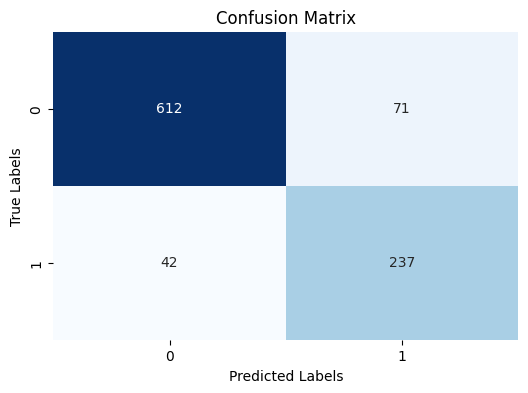


Class-wise Accuracy:
Class 0: 612/683 (89.60%)
Class 1: 237/279 (84.95%)

Precision-Recall Curve:


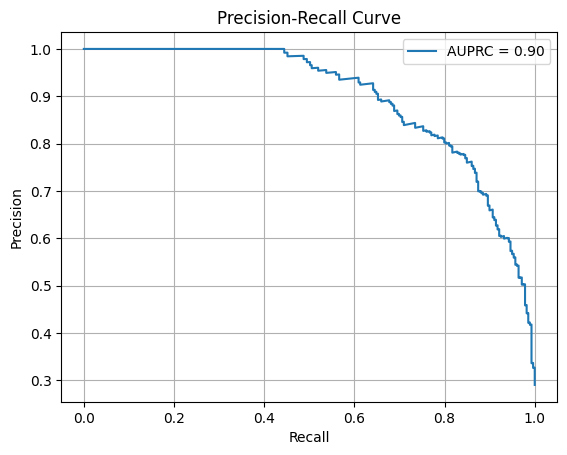


ROC Curve:


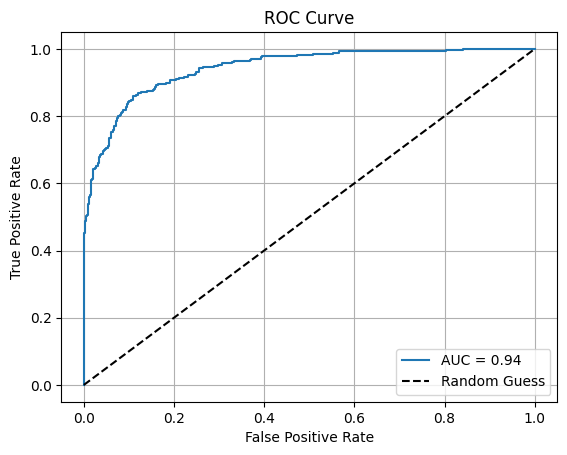


Mean F1 Score: 0.8615
Balanced Accuracy: 0.8728
Average AUPRC: 0.8972

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       683
           1       0.77      0.85      0.81       279

    accuracy                           0.88       962
   macro avg       0.85      0.87      0.86       962
weighted avg       0.89      0.88      0.88       962


PARAMETER SET 3 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.8115
   Fold 2: 0.7930
   Fold 3: 0.7896
   Fold 4: 0.7764
   Fold 5: 0.8728

2) Average balanced accuracy across all folds: 0.8086

3) Average AUPRC across all folds: 0.8256

4) AUPRC per fold:
   Fold 1: 0.7663
   Fold 2: 0.8437
   Fold 3: 0.8013
   Fold 4: 0.8194
   Fold 5: 0.8972

5) Best fold class-wise accuracy (Fold 5):
   Class 0: 0.8960
   Class 1: 0.8495


RUNNING PARAMETER SET 4/5
Parameters: {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.00010881956338415986, 'weight_d

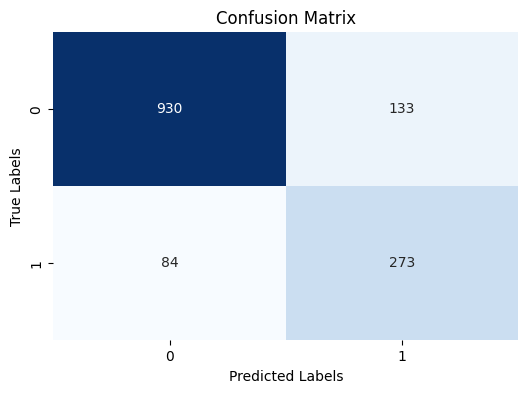


Class-wise Accuracy:
Class 0: 930/1063 (87.49%)
Class 1: 273/357 (76.47%)

Precision-Recall Curve:


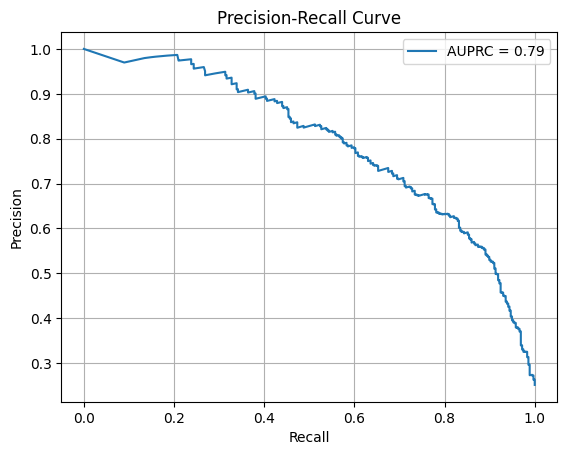


ROC Curve:


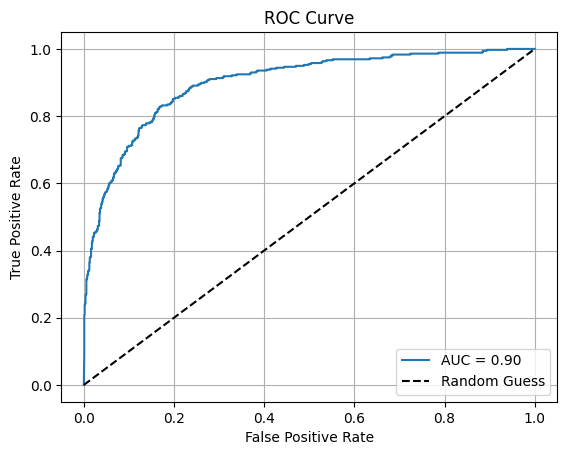


Mean F1 Score: 0.8056
Balanced Accuracy: 0.8198
Average AUPRC: 0.7913

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1063
           1       0.67      0.76      0.72       357

    accuracy                           0.85      1420
   macro avg       0.79      0.82      0.81      1420
weighted avg       0.86      0.85      0.85      1420

Fold No: 2
Epoch [1/100], Loss: 0.6575, Accuracy: 0.6379
Validation Loss: 0.6541, Validation Accuracy: 0.7120
Epoch [2/100], Loss: 0.6205, Accuracy: 0.7409
Validation Loss: 0.6381, Validation Accuracy: 0.7383
Epoch [3/100], Loss: 0.6140, Accuracy: 0.7456
Validation Loss: 0.5833, Validation Accuracy: 0.7079
Epoch [4/100], Loss: 0.5975, Accuracy: 0.7784
Validation Loss: 0.5958, Validation Accuracy: 0.7333
Epoch [5/100], Loss: 0.5955, Accuracy: 0.7747
Validation Loss: 0.6203, Validation Accuracy: 0.7679
Epoch [6/100], Loss: 0.5904, Accuracy: 0.7908
Validation Loss: 0.7474, V

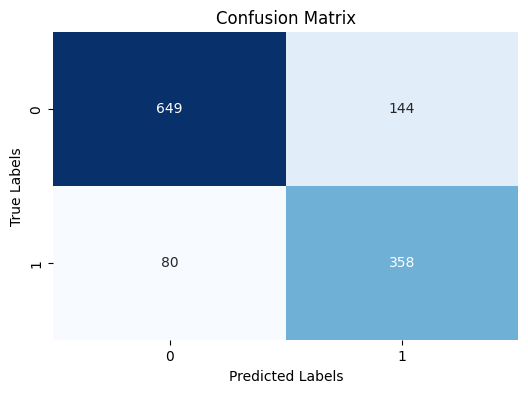


Class-wise Accuracy:
Class 0: 649/793 (81.84%)
Class 1: 358/438 (81.74%)

Precision-Recall Curve:


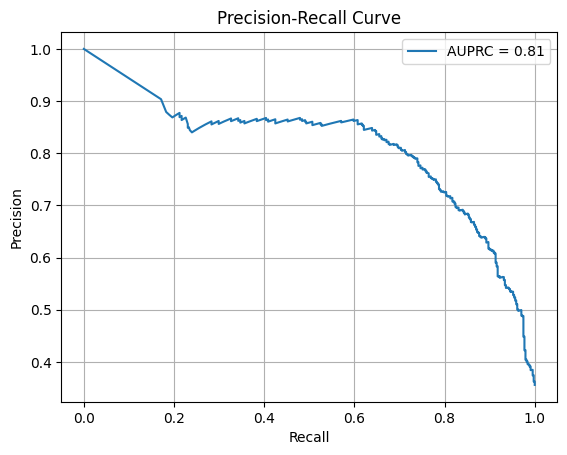


ROC Curve:


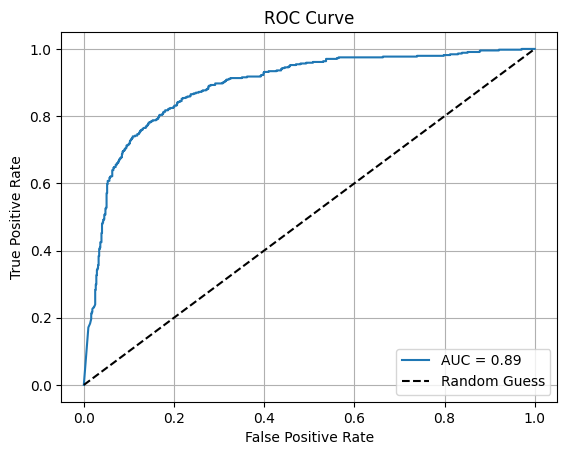


Mean F1 Score: 0.8073
Balanced Accuracy: 0.8179
Average AUPRC: 0.8120

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       793
           1       0.71      0.82      0.76       438

    accuracy                           0.82      1231
   macro avg       0.80      0.82      0.81      1231
weighted avg       0.83      0.82      0.82      1231

Fold No: 3
Epoch [1/100], Loss: 0.6593, Accuracy: 0.6432
Validation Loss: 0.6358, Validation Accuracy: 0.6599
Epoch [2/100], Loss: 0.6110, Accuracy: 0.7616
Validation Loss: 0.6231, Validation Accuracy: 0.7047
Epoch [3/100], Loss: 0.6065, Accuracy: 0.7606
Validation Loss: 0.6173, Validation Accuracy: 0.6958
Epoch [4/100], Loss: 0.5793, Accuracy: 0.8136
Validation Loss: 0.6292, Validation Accuracy: 0.7370
Epoch [5/100], Loss: 0.6089, Accuracy: 0.7600
Validation Loss: 0.6304, Validation Accuracy: 0.7598
Epoch [6/100], Loss: 0.5826, Accuracy: 0.8028
Validation Loss: 0.6167, V

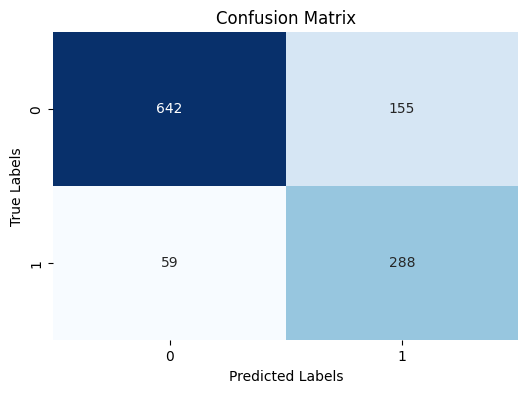


Class-wise Accuracy:
Class 0: 642/797 (80.55%)
Class 1: 288/347 (83.00%)

Precision-Recall Curve:


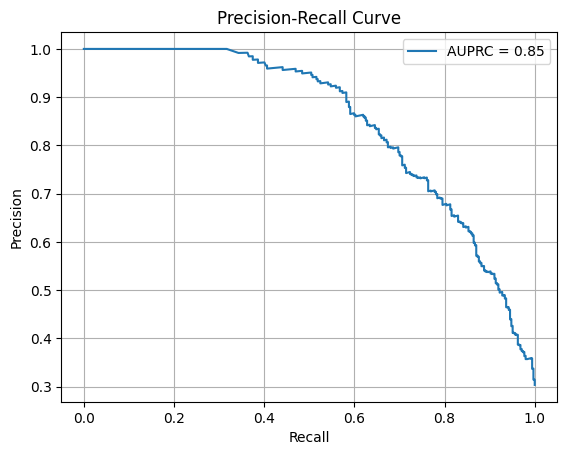


ROC Curve:


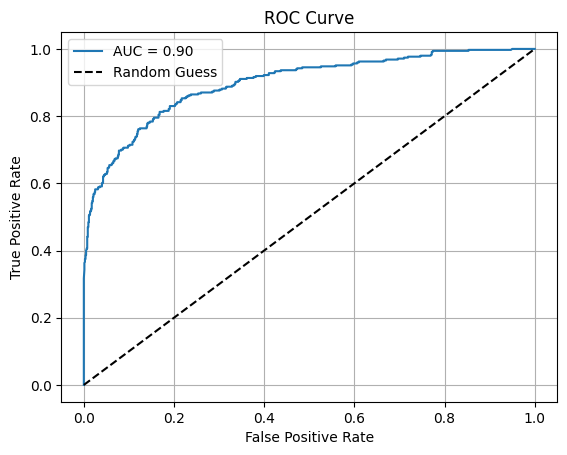


Mean F1 Score: 0.7931
Balanced Accuracy: 0.8177
Average AUPRC: 0.8469

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       797
           1       0.65      0.83      0.73       347

    accuracy                           0.81      1144
   macro avg       0.78      0.82      0.79      1144
weighted avg       0.84      0.81      0.82      1144

Fold No: 4
Epoch [1/100], Loss: 0.6840, Accuracy: 0.5493
Validation Loss: 0.6490, Validation Accuracy: 0.7199
Epoch [2/100], Loss: 0.6306, Accuracy: 0.7146
Validation Loss: 0.6003, Validation Accuracy: 0.7337
Epoch [3/100], Loss: 0.6176, Accuracy: 0.7528
Validation Loss: 0.5898, Validation Accuracy: 0.7420
Epoch [4/100], Loss: 0.6123, Accuracy: 0.7500
Validation Loss: 0.6225, Validation Accuracy: 0.7505
Epoch [5/100], Loss: 0.6001, Accuracy: 0.7803
Validation Loss: 0.5848, Validation Accuracy: 0.7577
Epoch [6/100], Loss: 0.5947, Accuracy: 0.7789
Validation Loss: 0.5911, V

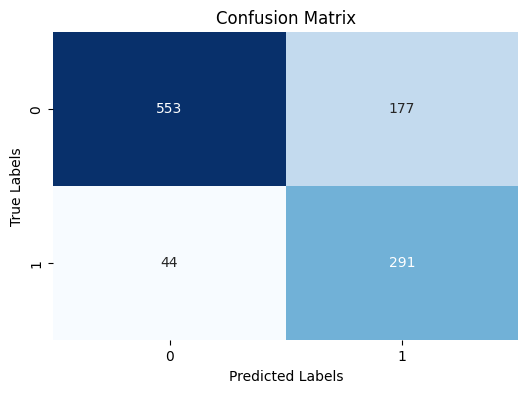


Class-wise Accuracy:
Class 0: 553/730 (75.75%)
Class 1: 291/335 (86.87%)

Precision-Recall Curve:


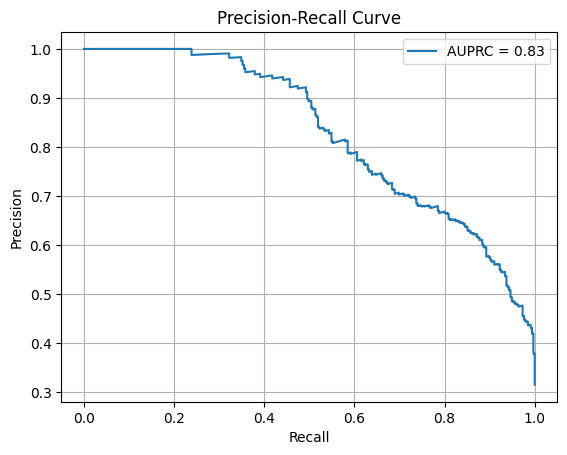


ROC Curve:


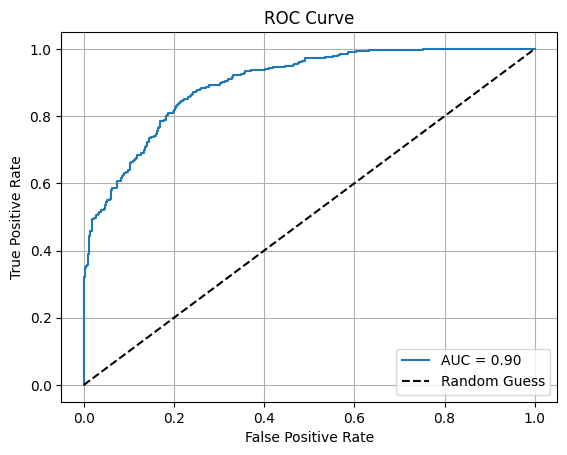


Mean F1 Score: 0.7791
Balanced Accuracy: 0.8131
Average AUPRC: 0.8280

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       730
           1       0.62      0.87      0.72       335

    accuracy                           0.79      1065
   macro avg       0.77      0.81      0.78      1065
weighted avg       0.83      0.79      0.80      1065

Fold No: 5
Epoch [1/100], Loss: 0.6699, Accuracy: 0.6081
Validation Loss: 0.6502, Validation Accuracy: 0.7438
Epoch [2/100], Loss: 0.6269, Accuracy: 0.7215
Validation Loss: 0.6962, Validation Accuracy: 0.7150
Epoch [3/100], Loss: 0.6169, Accuracy: 0.7461
Validation Loss: 0.5933, Validation Accuracy: 0.8120
Epoch [4/100], Loss: 0.6131, Accuracy: 0.7522
Validation Loss: 0.5697, Validation Accuracy: 0.7501
Epoch [5/100], Loss: 0.6172, Accuracy: 0.7443
Validation Loss: 0.5612, Validation Accuracy: 0.8286
Epoch [6/100], Loss: 0.6007, Accuracy: 0.7723
Validation Loss: 0.5760, V

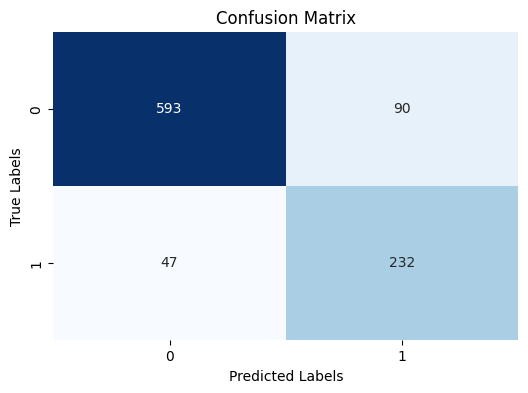


Class-wise Accuracy:
Class 0: 593/683 (86.82%)
Class 1: 232/279 (83.15%)

Precision-Recall Curve:


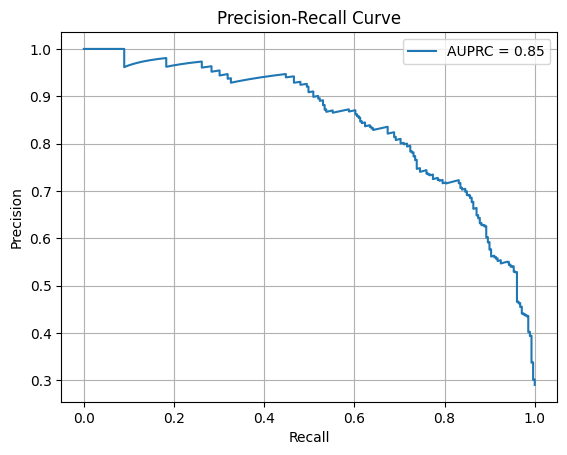


ROC Curve:


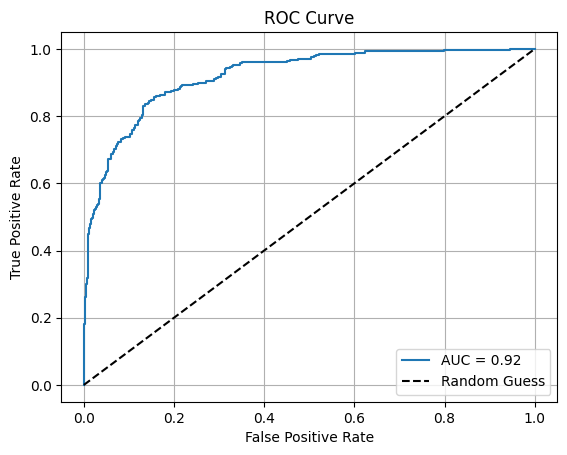


Mean F1 Score: 0.8342
Balanced Accuracy: 0.8499
Average AUPRC: 0.8454

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       683
           1       0.72      0.83      0.77       279

    accuracy                           0.86       962
   macro avg       0.82      0.85      0.83       962
weighted avg       0.87      0.86      0.86       962


PARAMETER SET 4 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.8198
   Fold 2: 0.8179
   Fold 3: 0.8177
   Fold 4: 0.8131
   Fold 5: 0.8499

2) Average balanced accuracy across all folds: 0.8237

3) Average AUPRC across all folds: 0.8247

4) AUPRC per fold:
   Fold 1: 0.7913
   Fold 2: 0.8120
   Fold 3: 0.8469
   Fold 4: 0.8280
   Fold 5: 0.8454

5) Best fold class-wise accuracy (Fold 5):
   Class 0: 0.8682
   Class 1: 0.8315


RUNNING PARAMETER SET 5/5
Parameters: {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.0001667453140535747, 'weight_de

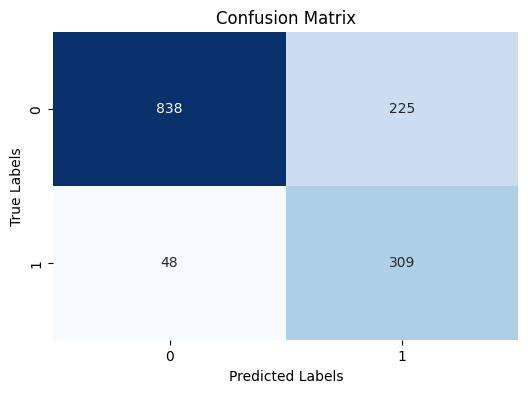


Class-wise Accuracy:
Class 0: 838/1063 (78.83%)
Class 1: 309/357 (86.55%)

Precision-Recall Curve:


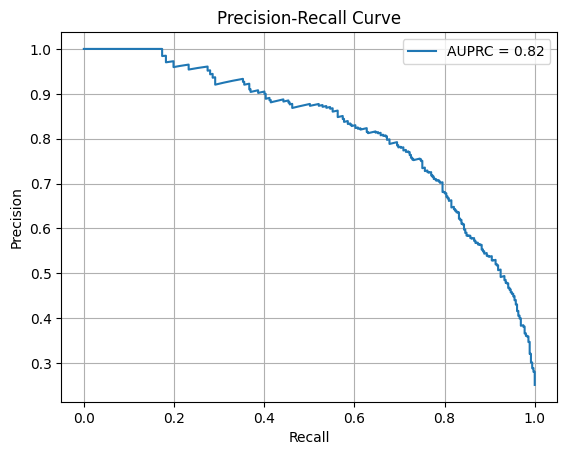


ROC Curve:


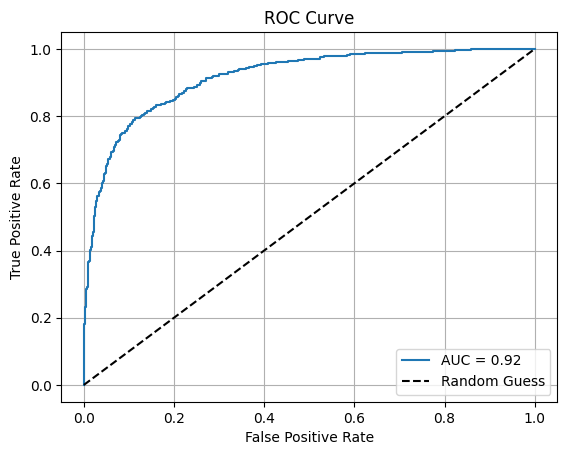


Mean F1 Score: 0.7768
Balanced Accuracy: 0.8269
Average AUPRC: 0.8193

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1063
           1       0.58      0.87      0.69       357

    accuracy                           0.81      1420
   macro avg       0.76      0.83      0.78      1420
weighted avg       0.85      0.81      0.82      1420

Fold No: 2
Epoch [1/100], Loss: 0.6637, Accuracy: 0.6160
Validation Loss: 0.6820, Validation Accuracy: 0.6896
Epoch [2/100], Loss: 0.6323, Accuracy: 0.7149
Validation Loss: 0.5930, Validation Accuracy: 0.7237
Epoch [3/100], Loss: 0.6051, Accuracy: 0.7617
Validation Loss: 0.6084, Validation Accuracy: 0.7582
Epoch [4/100], Loss: 0.6046, Accuracy: 0.7700
Validation Loss: 0.5807, Validation Accuracy: 0.6880
Epoch [5/100], Loss: 0.6071, Accuracy: 0.7706
Validation Loss: 0.5964, Validation Accuracy: 0.6003
Epoch [6/100], Loss: 0.6050, Accuracy: 0.7596
Validation Loss: 0.5955, V

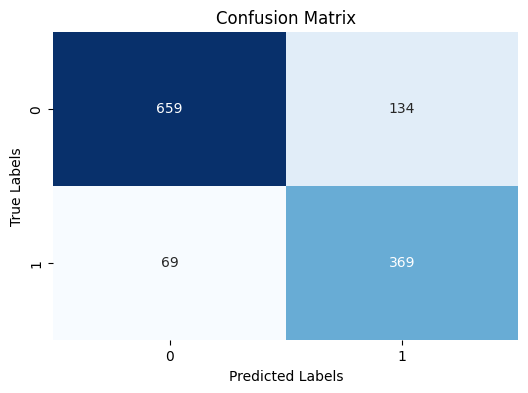


Class-wise Accuracy:
Class 0: 659/793 (83.10%)
Class 1: 369/438 (84.25%)

Precision-Recall Curve:


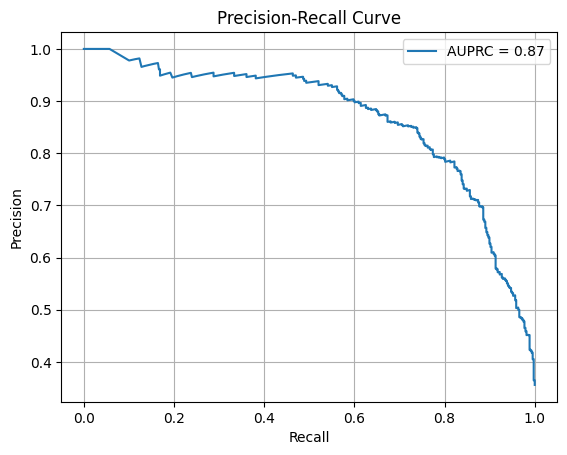


ROC Curve:


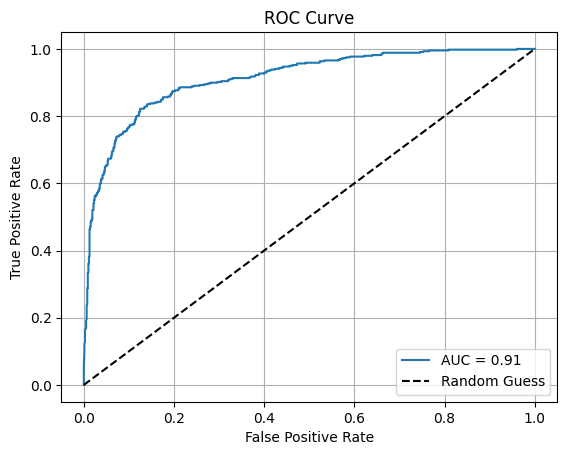


Mean F1 Score: 0.8254
Balanced Accuracy: 0.8367
Average AUPRC: 0.8687

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       793
           1       0.73      0.84      0.78       438

    accuracy                           0.84      1231
   macro avg       0.82      0.84      0.83      1231
weighted avg       0.84      0.84      0.84      1231

Fold No: 3
Epoch [1/100], Loss: 0.6736, Accuracy: 0.6071
Validation Loss: 0.6731, Validation Accuracy: 0.6464
Epoch [2/100], Loss: 0.6285, Accuracy: 0.7255
Validation Loss: 0.6332, Validation Accuracy: 0.6431
Epoch [3/100], Loss: 0.5993, Accuracy: 0.7760
Validation Loss: 0.6145, Validation Accuracy: 0.7280
Epoch [4/100], Loss: 0.6132, Accuracy: 0.7606
Validation Loss: 0.6370, Validation Accuracy: 0.7421
Epoch [5/100], Loss: 0.5857, Accuracy: 0.7956
Validation Loss: 0.6130, Validation Accuracy: 0.7643
Epoch [6/100], Loss: 0.5898, Accuracy: 0.7920
Validation Loss: 0.6085, V

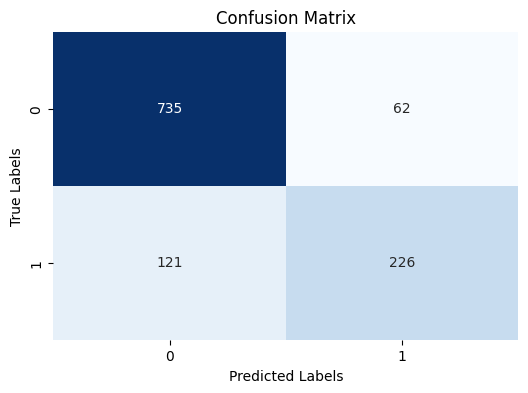


Class-wise Accuracy:
Class 0: 735/797 (92.22%)
Class 1: 226/347 (65.13%)

Precision-Recall Curve:


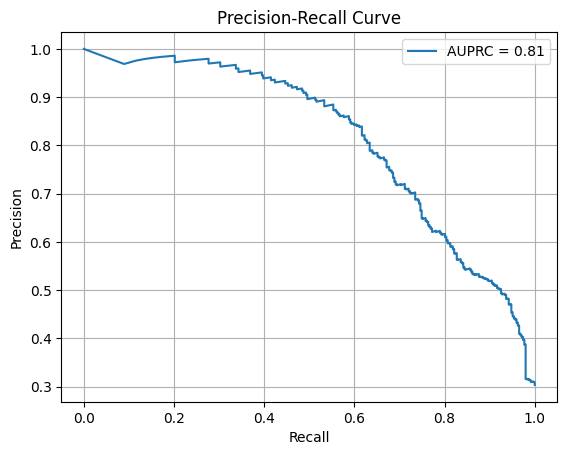


ROC Curve:


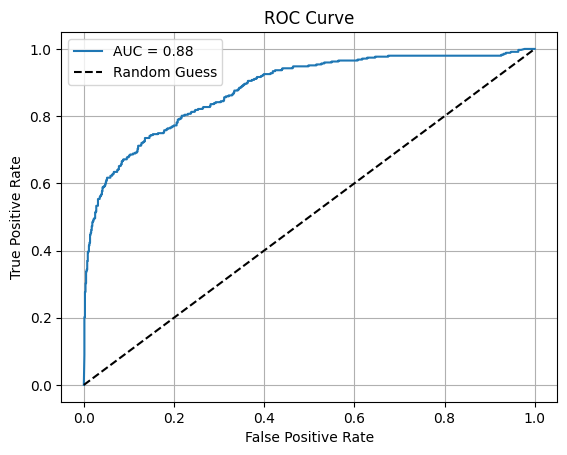


Mean F1 Score: 0.8006
Balanced Accuracy: 0.7868
Average AUPRC: 0.8134

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       797
           1       0.78      0.65      0.71       347

    accuracy                           0.84      1144
   macro avg       0.82      0.79      0.80      1144
weighted avg       0.84      0.84      0.84      1144

Fold No: 4
Epoch [1/100], Loss: 0.6698, Accuracy: 0.6066
Validation Loss: 0.6686, Validation Accuracy: 0.7024
Epoch [2/100], Loss: 0.6283, Accuracy: 0.7309
Validation Loss: 0.5995, Validation Accuracy: 0.6481
Epoch [3/100], Loss: 0.6269, Accuracy: 0.7207
Validation Loss: 0.5846, Validation Accuracy: 0.7265
Epoch [4/100], Loss: 0.6114, Accuracy: 0.7612
Validation Loss: 0.5925, Validation Accuracy: 0.7045
Epoch [5/100], Loss: 0.6260, Accuracy: 0.7253
Validation Loss: 0.6323, Validation Accuracy: 0.7670
Epoch [6/100], Loss: 0.5887, Accuracy: 0.7905
Validation Loss: 0.5811, V

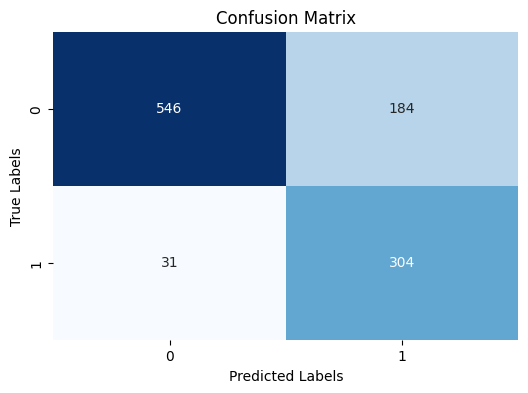


Class-wise Accuracy:
Class 0: 546/730 (74.79%)
Class 1: 304/335 (90.75%)

Precision-Recall Curve:


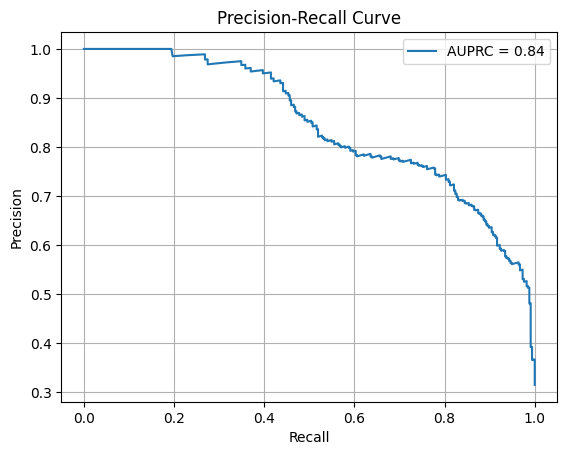


ROC Curve:


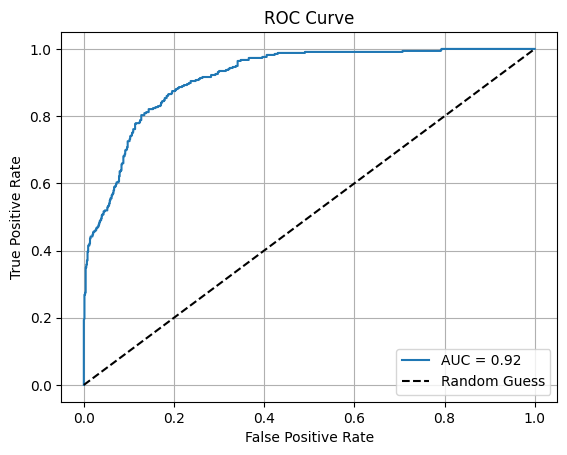


Mean F1 Score: 0.7871
Balanced Accuracy: 0.8277
Average AUPRC: 0.8447

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       730
           1       0.62      0.91      0.74       335

    accuracy                           0.80      1065
   macro avg       0.78      0.83      0.79      1065
weighted avg       0.84      0.80      0.81      1065

Fold No: 5
Epoch [1/100], Loss: 0.6623, Accuracy: 0.6467
Validation Loss: 0.6205, Validation Accuracy: 0.7763
Epoch [2/100], Loss: 0.6273, Accuracy: 0.7281
Validation Loss: 0.7195, Validation Accuracy: 0.6704
Epoch [3/100], Loss: 0.6233, Accuracy: 0.7408
Validation Loss: 0.5802, Validation Accuracy: 0.7742
Epoch [4/100], Loss: 0.6195, Accuracy: 0.7391
Validation Loss: 0.6279, Validation Accuracy: 0.7752
Epoch [5/100], Loss: 0.6125, Accuracy: 0.7544
Validation Loss: 0.6099, Validation Accuracy: 0.7934
Epoch [6/100], Loss: 0.6048, Accuracy: 0.7710
Validation Loss: 0.5756, V

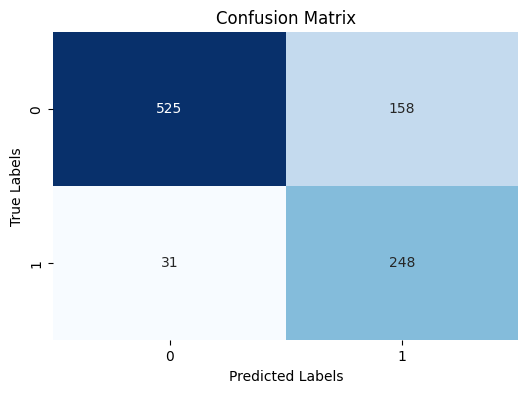


Class-wise Accuracy:
Class 0: 525/683 (76.87%)
Class 1: 248/279 (88.89%)

Precision-Recall Curve:


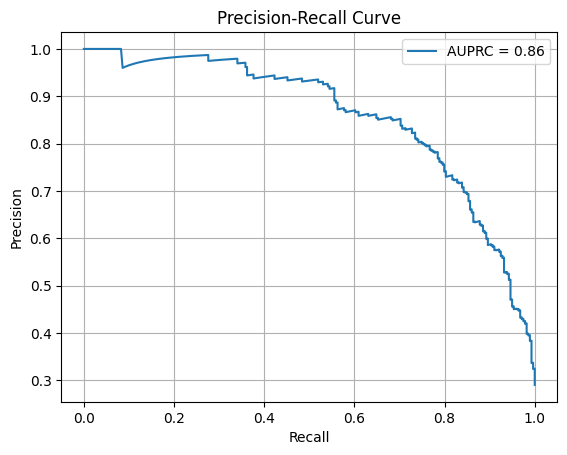


ROC Curve:


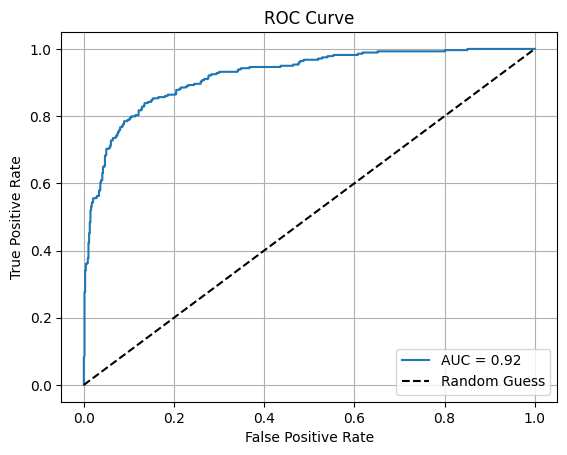


Mean F1 Score: 0.7858
Balanced Accuracy: 0.8288
Average AUPRC: 0.8575

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       683
           1       0.61      0.89      0.72       279

    accuracy                           0.80       962
   macro avg       0.78      0.83      0.79       962
weighted avg       0.85      0.80      0.81       962


PARAMETER SET 5 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.8269
   Fold 2: 0.8367
   Fold 3: 0.7868
   Fold 4: 0.8277
   Fold 5: 0.8288

2) Average balanced accuracy across all folds: 0.8214

3) Average AUPRC across all folds: 0.8407

4) AUPRC per fold:
   Fold 1: 0.8193
   Fold 2: 0.8687
   Fold 3: 0.8134
   Fold 4: 0.8447
   Fold 5: 0.8575

5) Best fold class-wise accuracy (Fold 2):
   Class 0: 0.8310
   Class 1: 0.8425


ALL PARAMETER SETS COMPLETED!


In [11]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

top_params = [
    # trial 112, accuracy: 0.7099
    {'hidden_size': 64, 'num_layers': 4, 'learning_rate': 0.0003457860039763819, 'weight_decay': 5.944172232271371e-06, 'batch_size': 32, 'dropout': 0.3, 'label_smoothing': 0.3, 'factor': 1, 'optimizer_name': 'Adam'},  
    # trial 90, accuracy: 0.7020
    {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.00046037658937661427, 'weight_decay': 8.389509863697752e-06, 'batch_size': 32, 'dropout': 0.3, 'label_smoothing': 0.3, 'factor': 1, 'optimizer_name': 'Adam'},  
    # trial 229, accuracy: 0.7086
    {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.00020601678097967096, 'weight_decay': 1.4147278204236746e-05, 'batch_size': 32, 'dropout': 0.2, 'label_smoothing': 0.3, 'factor': 1, 'optimizer_name': 'Adam'},  
    # trial 174, accuracy: 0.6843
    {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.00010881956338415986, 'weight_decay': 7.962304579713443e-06, 'batch_size': 32, 'dropout': 0.2, 'label_smoothing': 0.3, 'factor': 1, 'optimizer_name': 'Adam'},  
    # trial 242, accuracy: 0.6814
    {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.0001667453140535747, 'weight_decay': 1.0022271626546467e-05, 'batch_size': 32, 'dropout': 0.2, 'label_smoothing': 0.3, 'factor': 1, 'optimizer_name': 'Adam'},  
]


# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

# Model and training configurations
num_classes = 2
input_size = 224 * 3
epochs = 100
input_size = 224*3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file

    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }

    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc

    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)

    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])

    # Check if file exists
    file_exists = os.path.isfile(csv_path)

    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")
    
    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Loop through all parameter sets
for param_idx, params in enumerate(top_params):
    print(f"\n{'='*80}")
    print(f"RUNNING PARAMETER SET {param_idx + 1}/5")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Extract parameters
    hidden_size = params["hidden_size"]
    num_layers = params.get("num_layers", 1)
    dropout = params["dropout"]
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']

    # Initialize lists for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')

        # Initialize model, loss, and optimizer
        fold_model = LstmAttention(
              input_size=input_size,
              hidden_size=hidden_size,
              num_layers=num_layers,
              num_classes=num_classes,
              dropout=dropout
              ).to(device)

        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)

        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.reshape((train_data.shape[0],train_data.shape[1],train_data.shape[2]*train_data.shape[3]))
        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)

        early_stopping = EarlyStopping(patience=10)

        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold]
            val_data = val_data.reshape((val_data.shape[0],val_data.shape[1],val_data.shape[2]*val_data.shape[3]))  # reshape to lstm input shape
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold]
        test_data = test_data.reshape((test_data.shape[0],test_data.shape[1],test_data.shape[2]*test_data.shape[3]))  # reshape to lstm input shape
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Calculate class-wise accuracy
        class_accuracies = cm.diagonal() / cm.sum(axis=1)
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)

    # Find best fold based on balanced accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]

    print("\n" + "="*60)
    print(f"PARAMETER SET {param_idx + 1} RESULTS SUMMARY")
    print("="*60)

    print(f'\n1) Balanced accuracy for each fold:')
    for i, acc in enumerate(fold_accuracies):
        print(f'   Fold {i+1}: {acc:.4f}')

    print(f'\n2) Average balanced accuracy across all folds: {mean_accuracy:.4f}')

    print(f'\n3) Average AUPRC across all folds: {average_auprc:.4f}')

    print(f'\n4) AUPRC per fold:')
    for i, auprc in enumerate(fold_auprcs):
        print(f'   Fold {i+1}: {auprc:.4f}')

    print(f'\n5) Best fold class-wise accuracy (Fold {best_fold_idx+1}):')
    for i, class_acc in enumerate(best_fold_class_accuracies):
        print(f'   Class {i}: {class_acc:.4f}')

    print("\n" + "="*60)
    
    # Save results for this parameter set
    model_info = f"LstmAttention_paramset_{param_idx+1}_hidden_{hidden_size}_layers_{num_layers}_dropout_{dropout}"

print(f"\n{'='*80}")
print("ALL PARAMETER SETS COMPLETED!")
print(f"{'='*80}")
